<a href="https://colab.research.google.com/github/RifkiSstwnn/22_Rifki-Setiawan_PCVK_Sem5_2024/blob/main/Rifki_Setiawan_22_3H_Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/morphology.png', cv.IMREAD_GRAYSCALE)

#### Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring ElementDilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar morphology.png)

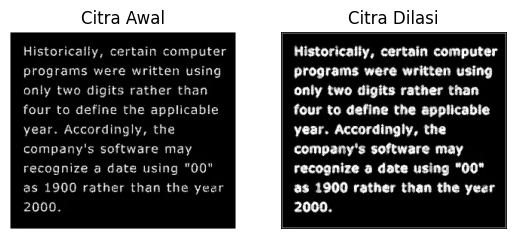

In [4]:
def dilasi(img, kernel):

    # Dapatkan dimensi citra
    height, width = img.shape

    # Inisialisasi citra hasil dilasi
    dilated_img = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan dilasi
    for i in range(1, height-1):
        for j in range(1, width-1):
            if len(img.shape) == 2:
                region = img[i-1:i+2, j-1:j+2]
            elif len(img.shape) == 3:
                region = img[i-1:i+2, j-1:j+2, :]
            dilated_img[i, j] = np.max(region * kernel)

    return dilated_img


# Buat SED cross 3x3
kernel = np.array([[0, 1, 0],
                    [1, 1, 1],
                    [0, 1, 0]], dtype=np.uint8)

dilated_img = dilasi(img, kernel)

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122)
plt.imshow(dilated_img, cmap='gray')
plt.title('Citra Dilasi')
plt.axis('off')
plt.show()

#### Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar |morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


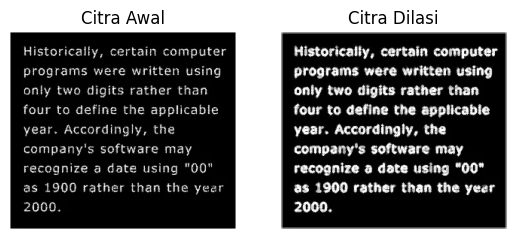

In [5]:
kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))

dilated_img = cv.dilate(img, kernel)

print(kernel)

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122)
plt.imshow(dilated_img, cmap='gray')
plt.title('Citra Dilasi')
plt.axis('off')
plt.show()

#### Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

In [6]:
j = cv.imread('/content/drive/MyDrive/PCVK/Images/j.png', cv.IMREAD_GRAYSCALE)

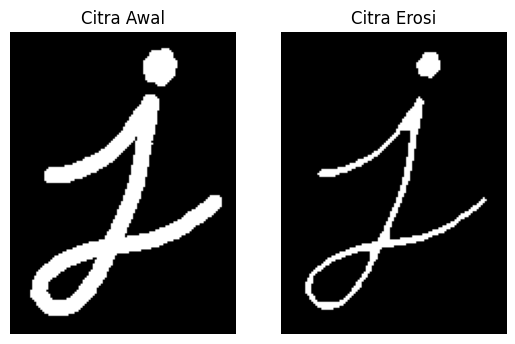

In [7]:
def erosi(image, kernel):

    # Dapatkan dimensi citra
    height, width = image.shape

    # Inisialisasi citra hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Looping untuk melakukan erosi
    img = np.zeros((image.shape[0]+2,image.shape[1]+2))
    img[1:-1,1:-1] = image
    for i in range(0,height-(kernel.shape[0]-1)):
        for j in range(0,width-(kernel.shape[0]-1)):
            eroded_image[i,j]=np.min(kernel * img[i:i+kernel.shape[0],j:j+kernel.shape[0]])

    return eroded_image

# Definisikan structuring element berbentuk kotak 5x5 secara manual
square_kernel = np.array([[1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1]], dtype=np.uint8)

eroded_image = erosi(j, square_kernel)

plt.subplot(121)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Erosi')
plt.axis('off')
plt.show()

#### Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


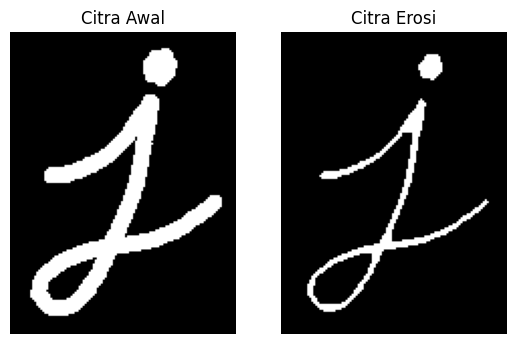

In [8]:
kernel = np.ones((5,5), np.uint8)

eroded_img = cv.erode(j, kernel, iterations = 1)

print(kernel)

plt.subplot(121)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(122)
plt.imshow(eroded_img, cmap='gray')
plt.title('Citra Erosi')
plt.axis('off')

plt.show()

#### Buatlah program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

In [9]:
fp = cv.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png', cv.IMREAD_GRAYSCALE)

In [10]:
def opening(image, kernel):

    # Operasi Erosi
    eroded_image = erosi(image, kernel)

    # Operasi Dilasi
    opened_image = dilasi(eroded_image, kernel)

    return opened_image

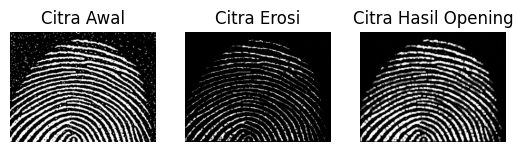

In [11]:
# Buat SE 3x3
kernel = np.ones((3, 3), np.uint8)
# Assign the result to a different variable name
eroded_img = erosi(fp, kernel)
open_img = opening(fp, kernel)

plt.subplot(131)
plt.imshow(fp, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132)
plt.imshow(eroded_img, cmap='gray')
plt.title('Citra Erosi')
plt.axis('off')

plt.subplot(133)
plt.imshow(open_img, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')
plt.show()

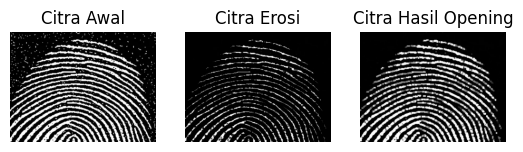

In [12]:
kernel = np.ones((3,3), np.uint8)
eroded_image = cv.erode(fp, kernel)
opened_img = cv.morphologyEx(fp, cv.MORPH_OPEN, kernel)

plt.subplot(131)
plt.imshow(fp, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132)
plt.imshow(eroded_image, cmap='gray')
plt.title('Citra Erosi')
plt.axis('off')

plt.subplot(133)
plt.imshow(opened_img, cmap='gray')
plt.title('Citra Hasil Opening')
plt.axis('off')

plt.show()

#### Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar fingerprint.png)

In [13]:
def closing(image, kernel):
    # Operasi Dilasi
    dilated_image = dilasi(image, kernel)

    # Operasi Erosi
    closed_image = erosi(dilated_image, kernel)

    return closed_image

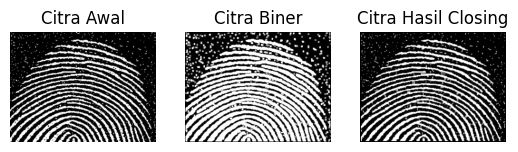

In [14]:
close_img = closing(fp, kernel)
dilated_img = dilasi(fp, kernel)

plt.subplot(131)
plt.imshow(fp, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132)
plt.imshow(dilated_img, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(133)
plt.imshow(close_img, cmap='gray')
plt.title('Citra Hasil Closing')
plt.axis('off')
plt.show()

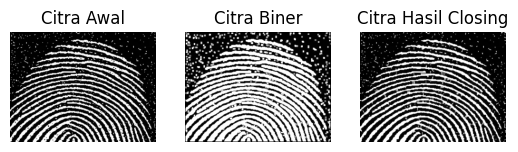

In [15]:
kernel = np.ones((3,3), np.uint8)
dilate_img = cv.dilate(fp, kernel)
closed_img = cv.morphologyEx(fp, cv.MORPH_CLOSE, kernel)

plt.subplot(131)
plt.imshow(fp, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(132)
plt.imshow(dilated_img, cmap='gray')
plt.title('Citra Biner')
plt.axis('off')

plt.subplot(133)
plt.imshow(closed_img, cmap='gray')
plt.title('Citra Hasil Closing')
plt.axis('off')

plt.show()

#### Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

In [16]:
def dilate(image, structuring_element):
    img_dilated = np.zeros_like(image)
    rows, cols = image.shape
    se_rows, se_cols = structuring_element.shape
    pad_x = se_cols // 2
    pad_y = se_rows // 2
    padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=0)

    for i in range(rows):
        for j in range(cols):
            roi = padded_image[i:i+se_rows, j:j+se_cols]
            img_dilated[i, j] = np.max(roi[structuring_element == 1])

    return img_dilated

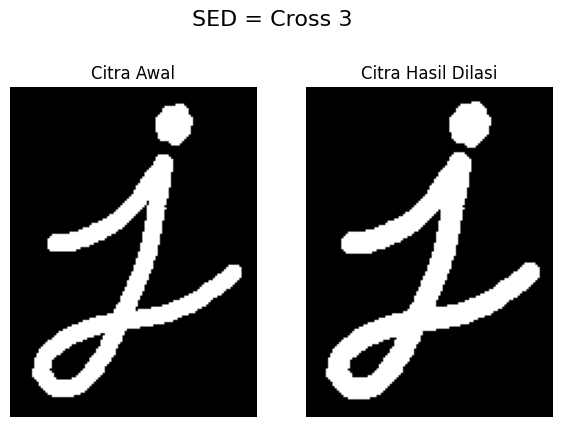

In [17]:
# Structuring element (3x3 cross)
se_cross_3x3 = np.array([[0, 1, 0],
                         [1, 1, 1],
                         [0, 1, 0]], dtype=np.uint8)

# Apply dilation
dilated_image = dilate(j, se_cross_3x3)

# Display the original and processed images
plt.figure(figsize=(7, 5))

plt.suptitle('SED = Cross 3', fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

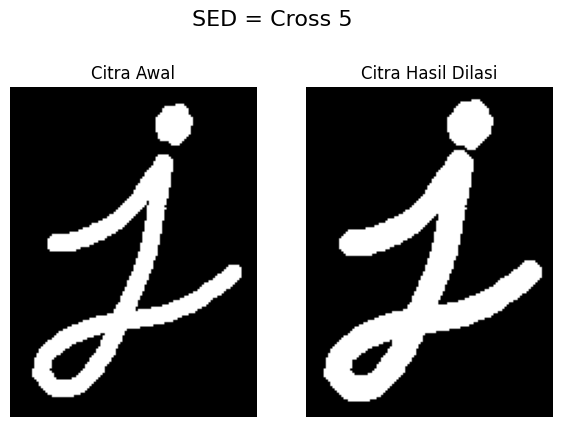

In [18]:
# Structuring element (5x5 cross)
se_cross_5x5 = np.array([[0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0],
                         [1, 1, 1, 1, 1],
                         [0, 0, 1, 0, 0],
                         [0, 0, 1, 0, 0]], dtype=np.uint8)

# Apply dilation
dilated_image = dilate(j, se_cross_5x5)

# Display the original and processed images
plt.figure(figsize=(7, 5))

plt.suptitle('SED = Cross 5', fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')
plt.axis('off')

plt.show()

#### Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

In [19]:
def erode(image, structuring_element):
    img_eroded = np.zeros_like(image)  # Output image
    rows, cols = image.shape
    se_rows, se_cols = structuring_element.shape
    pad_x = se_cols // 2
    pad_y = se_rows // 2
    padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=255)

    for i in range(rows):
        for j in range(cols):
            roi = padded_image[i:i+se_rows, j:j+se_cols]
            img_eroded[i, j] = np.min(roi[structuring_element == 1])

    return img_eroded

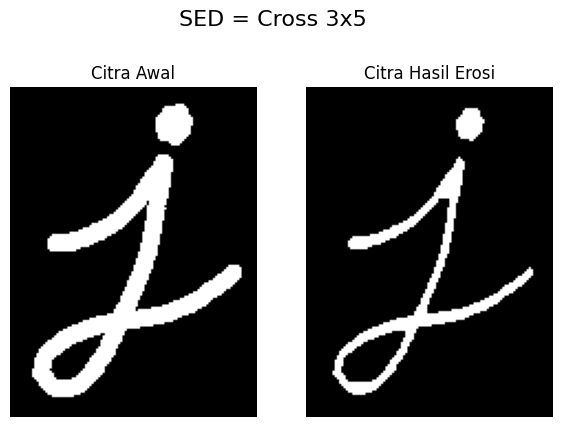

In [20]:
se_square_3x5 = np.ones((3, 5), dtype=np.uint8)

# Apply dilation
erote_img = erode(j, se_square_3x5)

# Display the original and processed images
plt.figure(figsize=(7, 5))

plt.suptitle('SED = Cross 3x5', fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erote_img, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

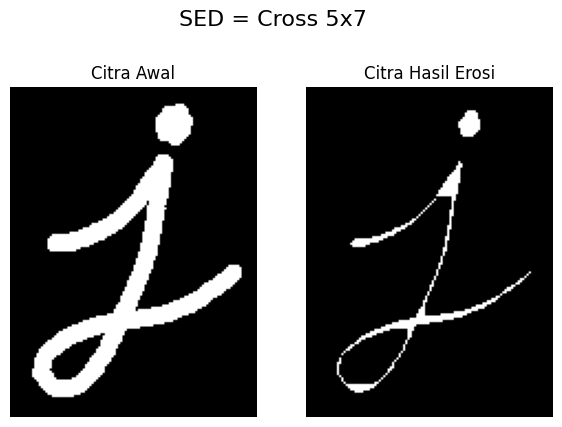

In [21]:
se_square_5x7 = np.ones((5, 7), dtype=np.uint8)

erote_img = erode(j, se_square_5x7)

# Display the original and processed images
plt.figure(figsize=(7, 5))

plt.suptitle('SED = Cross 5x7', fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erote_img, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()


#### Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

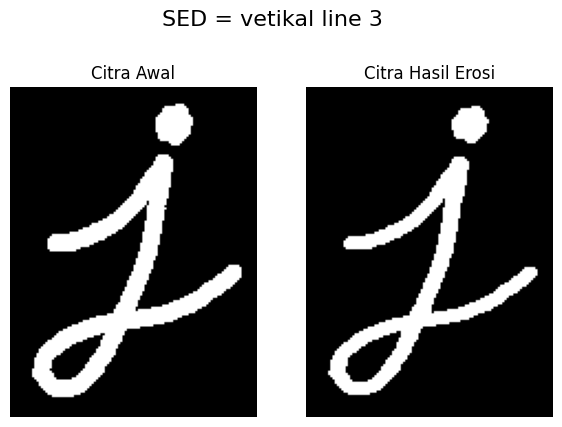

In [22]:
line_3 = np.array([[0, 1, 0],
                      [0, 1, 0],
                      [0, 1, 0]], dtype=np.uint8)

erote_img = erode(j, line_3)

# Display the original and processed images
plt.figure(figsize=(7, 5))

plt.suptitle('SED = vetikal line 3', fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erote_img, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

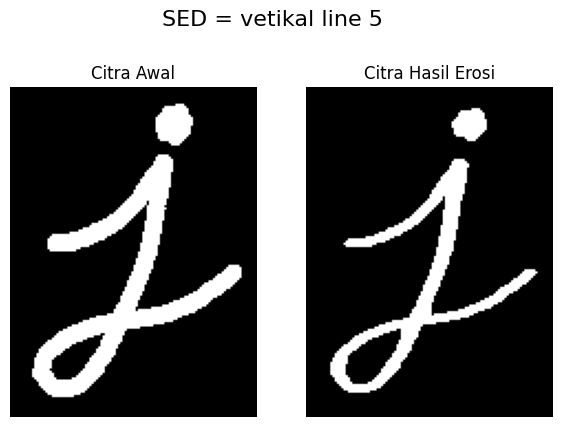

In [23]:
line_5 = np.array([[0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0],
                      [0, 0, 1, 0, 0]], dtype=np.uint8)

erote_img = erode(j, line_5)

# Display the original and processed images
plt.figure(figsize=(7, 5))

plt.suptitle('SED = vetikal line 5', fontsize=16)

plt.subplot(1, 2, 1)
plt.imshow(j, cmap='gray')
plt.title('Citra Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(erote_img, cmap='gray')
plt.title('Citra Hasil Erosi')
plt.axis('off')

plt.show()

## Tugas KTM

In [24]:
KTM = cv.imread('/content/drive/MyDrive/PCVK/Images/3C_2041720257_4 - Lian Mega Pertiwi.jpg' )
KTM = cv.cvtColor(KTM, cv.COLOR_BGR2RGB)

In [25]:
def sharpen_image(image, input):
    if input == 1:
        kernel = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])
    else:
        kernel = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])
    sharpened_image = cv.filter2D(src=image, ddepth=-1, kernel=kernel)
    return sharpened_image

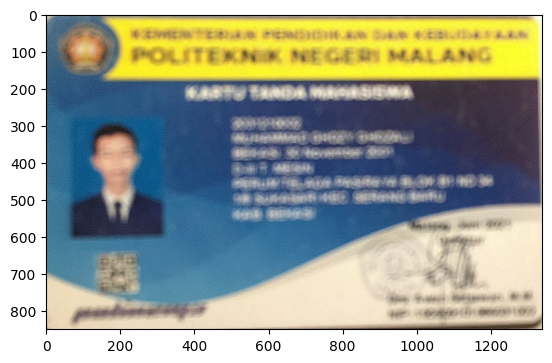

In [26]:
KTM_sharpen = KTM
for i in range(2):
  KTM_sharpen = sharpen_image(KTM_sharpen, 2)

# KTM_sharpen=cv.erode(KTM_sharpen, np.ones((3, 3), np.uint8))

plt.imshow(KTM_sharpen)

In [27]:
def clahe_image(image, clipLimit=1, tileGridSize=(6, 6)):
    lab = cv.cvtColor(image, cv.COLOR_RGB2LAB)
    l, a, b = cv.split(lab)

    clahe = cv.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
    cl = clahe.apply(l)

    limg = cv.merge((cl, a, b))
    enhanced_image = cv.cvtColor(limg, cv.COLOR_LAB2RGB)
    return enhanced_image

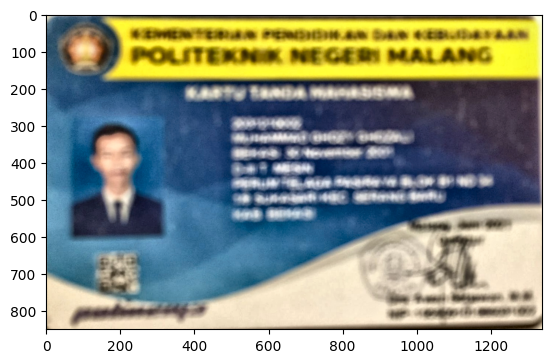

In [28]:
KTM_clahe = clahe_image(KTM, clipLimit=1.9, tileGridSize=(16, 16))
# KTM_clahe = clahe_image(KTM_clahe, clipLimit=0.8, tileGridSize=(8, 8))

plt.imshow(KTM_clahe)


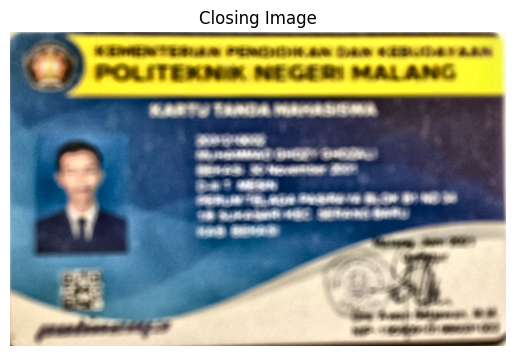

In [39]:
def erode(image, structuring_element):
    # If the image is not grayscale, convert to grayscale to avoid unpacking error.
    if len(image.shape) > 2:
        image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    img_eroded = np.zeros_like(image)  # Output image
    rows, cols = image.shape
    se_rows, se_cols = structuring_element.shape
    pad_x = se_cols // 2
    pad_y = se_rows // 2
    padded_image = np.pad(image, ((pad_y, pad_y), (pad_x, pad_x)), mode='constant', constant_values=255)

    for i in range(rows):
        for j in range(cols):
            roi = padded_image[i:i+se_rows, j:j+se_cols]
            img_eroded[i, j] = np.min(roi[structuring_element == 1])

    return img_eroded

se3 = np.ones((3, 3), dtype=np.uint8)
se5 = np.ones((5, 5), dtype=np.uint8)
se57 = np.ones((5, 7), dtype=np.uint8)
se35= np.ones((3, 5), dtype=np.uint8)
line_3 = np.array([[0, 1, 0],
                      [0, 1, 0],
                      [0, 1, 0]], dtype=np.uint8)
erote_img = cv.erode(KTM_clahe, line_3, iterations = 1)

erote = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3,3))
closing = cv.morphologyEx(KTM_clahe, cv.MORPH_CLOSE, kernel_closing)
# plt.figure(figsize=(30, 10))
# Tampilkan gambar dengan judul
plt.imshow(closing)
plt.title('Closing Image')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

# erote_img = cv.dilate(erote_img, se5, iterations = 2)

# erote_img = cv.morphologyEx(erote_img, cv.MORPH_CLOSE, line_3)

# erote_img = erode(KTM_clahe, se_square_5x7)

# plt.imshow(erote_img)

In [30]:
# Fungsi untuk Gaussian Sharpening menggunakan kernel manual
def gaussian_sharpen(image, kernel_size=21, sigma=5, alpha=1.0):

    # Membuat kernel Gaussian
    kernel = gaussian_kernel(kernel_size, sigma)

    # Melakukan konvolusi untuk setiap channel
    blurred = np.zeros_like(image)
    for c in range(3):  # RGB channels
        blurred[:,:,c] = cv.filter2D(image[:,:,c], -1, kernel)

    # Unsharp Masking
    sharpened = cv.addWeighted(image, 1 + alpha, blurred, -alpha, 0)

    # Menggunakan np.clip untuk memastikan nilai output berada dalam rentang [0, 255]
    sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

    return sharpened

def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

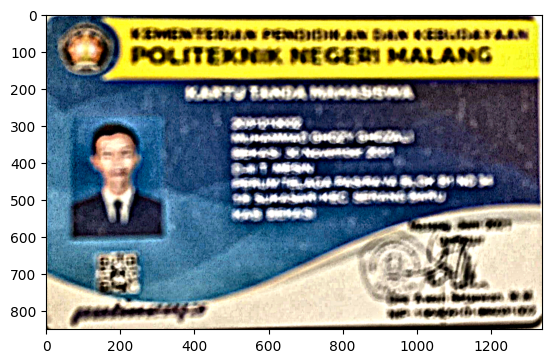

In [40]:
KTM_gaussian_sharpen = gaussian_sharpen(erote_img, kernel_size=40
                                        , sigma=7, alpha=3)
plt.imshow(KTM_gaussian_sharpen)

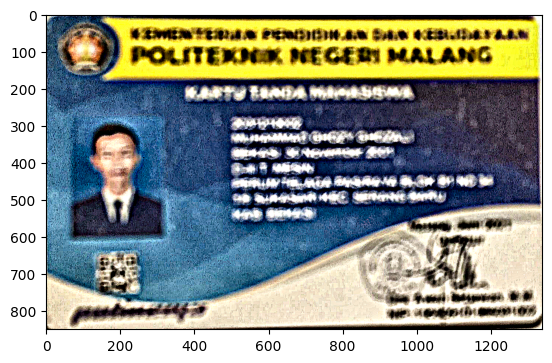

In [41]:
KTM_sharpen = KTM_gaussian_sharpen
for i in range(1):
  KTM_sharpen = sharpen_image(KTM_sharpen, 2)
plt.imshow(KTM_sharpen)